{'q_proj': 1, 'k_proj': 2, 'v_proj': 3, 'o_proj': 4, 'gate_proj': 5, 'up_proj': 6, 'down_proj': 7, 'lm_head': 8}


ValueError: resize only works on single-segment arrays

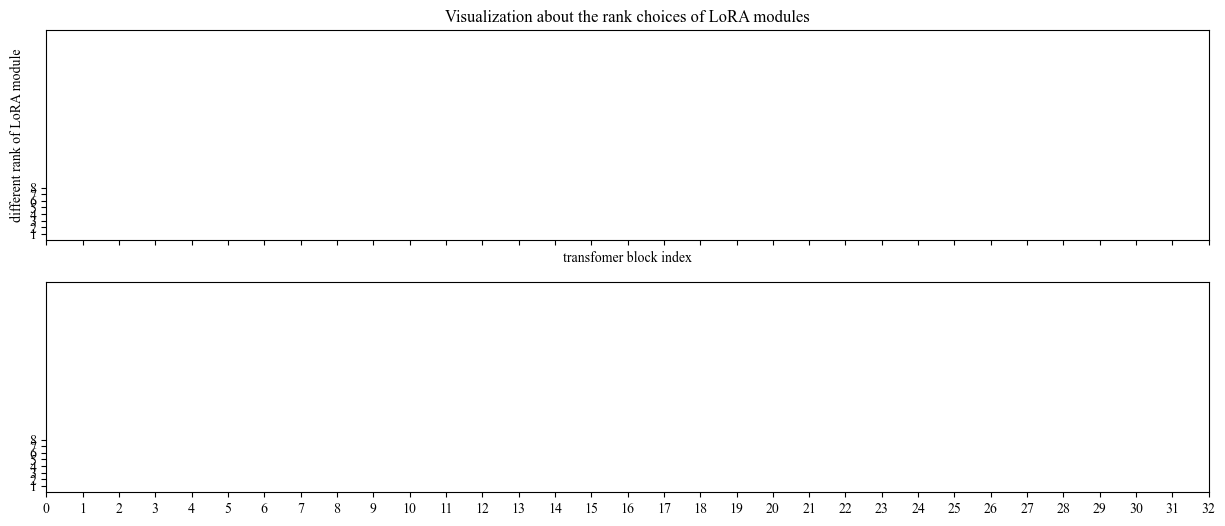

In [ ]:
import json
import os
import sys
sys.path.append("/mnt/bn/ecom-ccr-dev/mlx/users/dongjunwei/EasyGuard/examples/peft_llm")
from src.utils.auxiliary import load_yaml
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.colors as colors
search_rank_dict = {
    'lora_r2': 2,
    'lora_gelu_r2': 2,
    'lora_d_parts_r2': 2,
    'lora_r4': 4,
    'lora_gelu_r4': 4,
    'lora_d_parts_r4': 4,
    'lora_r8': 8,
    'lora_gelu_r8': 8,
    'lora_d_parts_r8': 8,
}
# search_rank_dict = {
#     'lora_r1': 1,
#     'lora_r2': 2,
#     'lora_r3': 3,
#     'lora_r4': 4,
#     'lora_r5': 5,
#     'lora_r6': 6,
#     'lora_r7': 7,
#     'lora_r8': 8,
#     'lora_r9': 9,
#     'lora_r10': 10,
#     'lora_r11': 11,
#     'lora_r12': 12,
# }

search_type_dict = {
    'lora_r2': 1,
    'lora_r4': 1,
    'lora_r8': 1,
    'lora_gelu_r4': 2,
    'lora_gelu_r2': 2,
    'lora_gelu_r8': 2,
    'lora_d_parts_r2': 3,
    'lora_d_parts_r4': 3,
    'lora_d_parts_r8': 3,
}
# search_type_dict = {
#     'lora_r1': 1,
#     'lora_r2': 1,
#     'lora_r3': 1,
#     'lora_r4': 1,
#     'lora_r5': 1,
#     'lora_r6': 1,
#     'lora_r7': 1,
#     'lora_r8': 1,
#     'lora_r9': 1,
#     'lora_r10': 1,
#     'lora_r11': 1,
#     'lora_r12': 1,
# }
ffn_type_dict = {
        'q_proj': 1, 
        'k_proj': 2, 
        'v_proj': 3,
        'o_proj': 4, 
        'gate_proj': 5, 
        'up_proj': 6, 
        'down_proj': 7, 
        'lm_head': 8, 
}
def get_points(path, search_space_path):    
    search_space = load_yaml(search_space_path)
    search_space_keys = list(search_space.keys())

    with open(path, 'r') as f:
        weights_data = json.load(f)
    choices = []
    for key, value in weights_data.items():
        choices_ = [key]
        for index, choice in enumerate(value):
            if choice == 1:
                # choices_.append(index)
                choices_.append(search_rank_dict[search_space_keys[index]])
                choices_.append(search_type_dict[search_space_keys[index]])
        choices.append(choices_)
    
    number_re = re.compile("\d")
    data_post = list(map(lambda x: [''.join(number_re.findall(x[0])), x[0].split('.')[-1], x[1], x[2]], choices))
    ffn_type = set([_[1] for _ in data_post])
    # print(data_post)
    
    
    data_post_new = list(map(lambda x:[int(x[0]) if x[0] != '' else '', ffn_type_dict[x[1]], x[2], x[3]], data_post))
    data_post_new[-1][0] = data_post_new[-2][0] + 1
    print(ffn_type_dict)
    heat_points = np.array(data_post_new)
    return heat_points

def plot_heat(heat_points):
    plt.rcParams["font.family"] = "Times New Roman"
    color_list = ["green", "yellow", "orange", "red"]
    cmap2 = colors.ListedColormap(color_list)
    fig, [ax1, ax2] = plt.subplots(2,1, figsize=(15, 6),sharex=True, sharey=True)
    ax1.set_title("Visualization about the rank choices of LoRA modules")
    ax1.set_xlabel("transfomer block index")
    ax1.set_ylabel("different rank of LoRA module")
    ax1.set_xticks(range(0, heat_points[-1][0] + 1))
    ax1.set_yticks(range(1, len(ffn_type_dict) + 1))
    # pos_1 = ax1.scatter(heat_points[:, 0], heat_points[:, 1], c=heat_points[:, 2], s=80, cmap=cmap2)
    print(heat_points[:, 0][:-1].reshape(32, 7))
    print(heat_points[:, 1])
    exit()
    pos_1 = ax1.pcolormesh(heat_points[:, 0], heat_points[:, 1], heat_points[:, 2], vmin=np.min(heat_points[:, 2]), vmax=np.max(heat_points[:, 2]), shading='auto')
    fig.colorbar(pos_1, ax=ax1, label="different rank of LoRA modules")
    
    ax2.set_title("Visualization about the type choices of LoRA modules")
    ax2.set_xlabel("transfomer block index")
    ax2.set_ylabel("different linear module")
    ax2.set_xticks(range(0, heat_points[-1][0] + 1))
    ax2.set_yticks(range(1, len(ffn_type_dict) + 1))
    # print(heat_points[:, 3])
    pos_2 = ax2.scatter(heat_points[:, 0], heat_points[:, 1], c=heat_points[:, 3], s=80, cmap='viridis_r')
    fig.colorbar(pos_2, ax=ax2, label="different type of LoRA modules")
    plt.subplots_adjust(wspace =0, hspace = 0.4)

# path = "/mnt/bn/ecom-ccr-dev/mlx/users/dongjunwei/EasyGuard/examples/peft_llm/model_output/naslora_v4/llama2/social_i_qa/independent/peft_naslora_lr1e-3_social_i_qa_independent_no_mlc_arch_lr005_60_20_22/adapter_masks.json"
# path = "/mnt/bn/ecom-ccr-dev/mlx/users/dongjunwei/EasyGuard/examples/peft_llm/model_output/naslora_v4/llama2/boolq/independent/peft_naslora_lr1e-3_boolq_independent_no_mlc_arch_lr002_pre_combibe_70_10/adapter_masks.json"
# # path = "/mnt/bn/ecom-ccr-dev/mlx/users/dongjunwei/EasyGuard/examples/peft_llm/model_output/naslora_v4/llama2/samsum/independent/peft_naslora_lr1e-3_independent_no_mlc_arch_lr001_60_20_22/adapter_masks.json"
search_space_path = "/mnt/bn/ecom-ccr-dev/mlx/users/dongjunwei/EasyGuard/examples/peft_llm/config/search_space/common.yml"
# search_space_path = "/mnt/bn/ecom-ccr-dev/mlx/users/dongjunwei/EasyGuard/examples/peft_llm/config/search_space/adalora.yml"
# heat_points = get_points(path, search_space_path)
# # print(heat_points)
# plot_heat(heat_points)
path="/mnt/bn/ecom-ccr-dev/mlx/users/dongjunwei/EasyGuard/examples/peft_llm/model_output/naslora_v4/llama2/boolq/independent/peft_naslora_lr1e-3_boolq_independent_no_mlc_arch_lr01_pre_combibe_70_10_steplr_10/adapter_masks.json"
heat_points = get_points(path, search_space_path)
plot_heat(heat_points)



[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]] [[0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4 4 4 4]
 [5 5 5 5 5 5 5 5 5 5]] [[0.7003673  0.74275081 0.70928001 0.56674552 0.97778533 0.70633485
  0.24791576 0.15788335 0.69769852 0.71995667]
 [0.25774443 0.34154678 0.96876117 0.6945071  0.46638326 0.7028127
  0.51178587 0.92874137 0.7397693  0.62243903]
 [0.65154547 0.39680761 0.54323939 0.79989953 0.72154473 0.29536398
  0.16094588 0.20612551 0.13432539 0.48060502]
 [0.34252181 0.36296929 0.97291764 0.11094361 0.38826409 0.78306588
  0.97289726 0.48320961 0.33642111 0.56741904]
 [0.04794151 0.38893703 0.90630365 0.16101821 0.74362113 0.63297416
  0.32418002 0.92237653 0.23722644 0.82394557]
 [0.75060714 0.11378445 0.84536125 0.92393213 0.22083679 0.93305388
  0.48899874 0.47471864 0.08916747 0.22994818]]


Text(0.5, 1.0, "shading='flat'")

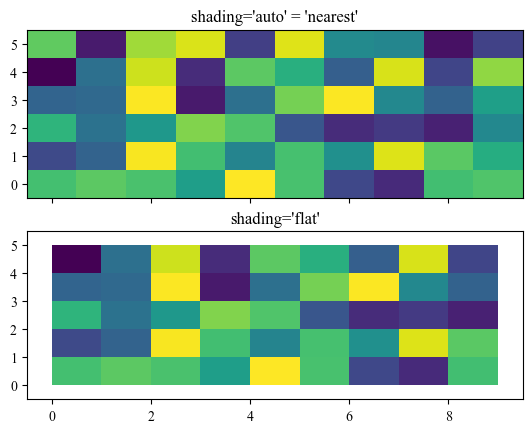

In [8]:
np.random.seed(19680801)
Z = np.random.rand(6, 10)
x = np.arange(-0.5, 10, 1)  # len = 11
y = np.arange(4.5, 11, 1)  # len = 7
x = np.arange(10)  # len = 10
y = np.arange(6)  # len = 6
X, Y = np.meshgrid(x, y)
print(X,Y,Z)
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
axs[0].pcolormesh(X, Y, Z, vmin=np.min(Z), vmax=np.max(Z), shading='auto')
axs[0].set_title("shading='auto' = 'nearest'")
axs[1].pcolormesh(X, Y, Z[:-1, :-1], vmin=np.min(Z), vmax=np.max(Z),
                  shading='flat')
axs[1].set_title("shading='flat'")

{'q_proj': 1, 'k_proj': 2, 'v_proj': 3, 'o_proj': 4, 'gate_proj': 5, 'up_proj': 6, 'down_proj': 7, 'lm_head': 8}


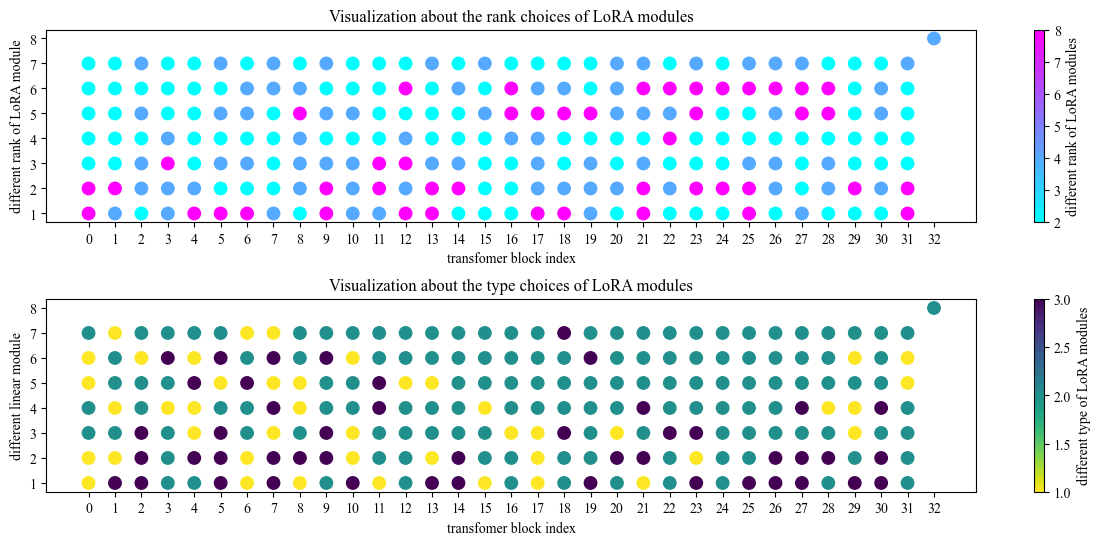

In [3]:
# path="/mnt/bn/ecom-ccr-dev/mlx/users/dongjunwei/EasyGuard/examples/peft_llm/model_output/naslora/llama2/social_i_qa/alternate_ratio/peft_naslora_lr1e-3_social_i_qa_cosine_alternate_04/adapter_weights.json"
path="/mnt/bn/ecom-ccr-dev/mlx/users/dongjunwei/EasyGuard/examples/peft_llm/model_output/naslora_v4/llama2/boolq/independent/peft_naslora_lr1e-3_boolq_independent_no_mlc_arch_lr01_pre_combibe_70_10_steplr_10/adapter_masks.json"
heat_points = get_points(path, search_space_path)
plot_heat(heat_points)

{'q_proj': 1, 'k_proj': 2, 'v_proj': 3, 'o_proj': 4, 'gate_proj': 5, 'up_proj': 6, 'down_proj': 7, 'lm_head': 8}


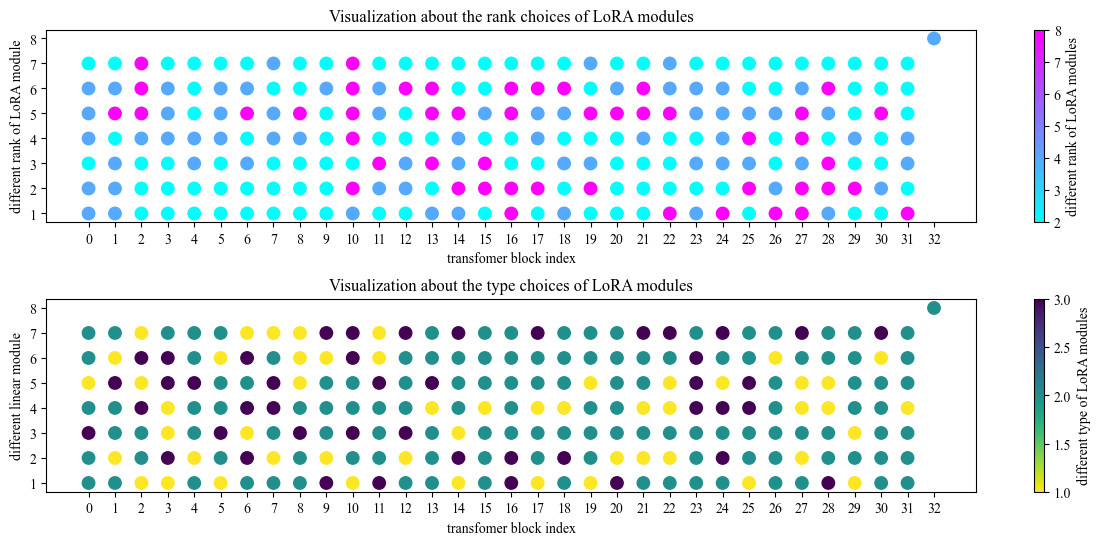

In [4]:

path="/mnt/bn/ecom-ccr-dev/mlx/users/dongjunwei/EasyGuard/examples/peft_llm/model_output/naslora_v4/llama2/samsum/independent/peft_naslora_lr1e-3_independent_no_mlc_arch_lr01_pre_combibe_70_10_steplr_10/adapter_masks.json"
heat_points = get_points(path, search_space_path)
plot_heat(heat_points)

# x_index = [_ for _ in range(len(data_post))]
# y_value = [_[1] for _ in data_post]
# plt.scatter(x_index, y_value)
# plt.show()